### First Irradiation

In [1]:
import pandas as pd

data = {
    "Bacteria": ["S.Typhi", "S.Typhi", "S.Typhi", "E.Coli", "E.Coli", "E.Coli", "serratia marcescens", "serratia marcescens", "serratia marcescens", "enterobacter aerogenes", "enterobacter aerogenes", "enterobacter aerogenes", "shigella flexneri", "shigella flexneri", "shigella flexneri"],
    100 : [0.243, 0.278, 0.29, 0.151, 0.162, 0.138, 0.197, 0.194, 0.202, 0.594, 0.505, 0.513, 0.138, 0.138, 0.13, ],
    200 : [0.24, 0.27, 0.294, 0.103, 0.106, 0.102, 0.113, 0.089, 0.121, 0.412, 0.424, 0.467, 0.113, 0.112, 0.116, ],
    300 : [0.207, 0.24, 0.249, 0.052, 0.076, 0.064, 0.051, 0.046, 0.033, 0.343, 0.352, 0.389, 0.111, 0.09, 0.101, ],
    400 : [0.114, 0.167, 0.147, 0.014, 0.004, 0.0, 0.029, 0.0, 0.010, 0.228, 0.263, 0.288, 0.043, 0.052, 0.041, ],
    500 : [0.059, 0.069, 0.099, 0.0, 0.006, 0.0, 0.005, 0.0, 0.0, 0.023, 0.086, 0.093, 0.005, 0.017, 0.016, ],
    600 : [0.033, 0.018, 0.016, 0.0, 0.002, 0.0, 0.0, 0.0, 0.006, 0.075, 0.005, 0.005, 0.009, 0.001, 0.01, ],
    700 : [0.002, 0.019, 0.000, 0.0, 0.001, 0.0, 0.0, 0.003, 0.0, 0.0, 0.004, 0.0, 0.0, 0.0, 0.002, ],
    800: [0.005, 0.005, 0.007, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.03, 0.0, 0.0, 0.02, 0.0, 0.0],
    900: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005, 0.001, 0., 0.0, 0.008, 0.0, 0.0],
    1000: [0.0, 0.002, 0.0, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0],
    "CONTROL": [0.222, 0.269, 0.284, 0.174, 0.184, 0.141, 0.25, 0.267, 0.313, 0.576, 0.559, 0.56, 0.154, 0.151, 0.169]
}
df = pd.DataFrame(data)


In [2]:
import numpy as np

# Subtract standard zero of the device (in our case it is already subtracted, so it would be zero)
number_to_subtract = 0.00
df_numeric = df.select_dtypes(include=[np.number]) - number_to_subtract

# Combine back into a single DataFrame with non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
df_adjusted = pd.concat([df_numeric, df_non_numeric], axis=1)

# Set 'Bacteria' as index for subsequent operations
df_adjusted.set_index('Bacteria', inplace=True)

In [3]:
# Normalize the measurements by the control for each bacteria
normalized_df = df_adjusted.div(df_adjusted["CONTROL"], axis=0) * 100

# Calculate the standard deviation for each bacteria group
std_df = normalized_df.groupby('Bacteria').std()

# Calculate the mean for each bacteria and each column
averaged_df = normalized_df.groupby('Bacteria').mean()

# Transpose the dataframe to group by doses, making the bacteria types become the legend
transposed_df = averaged_df.T
transposed_std_df = std_df.T

In [4]:
# Filter the dataframes to include only columns up to '700'
filtered_df = transposed_df[0:7]
filtered_std_df = transposed_std_df[0:7]

<ipython-input-5-e132872ff192>:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (column_name, column_data) in enumerate(filtered_df.iteritems()):


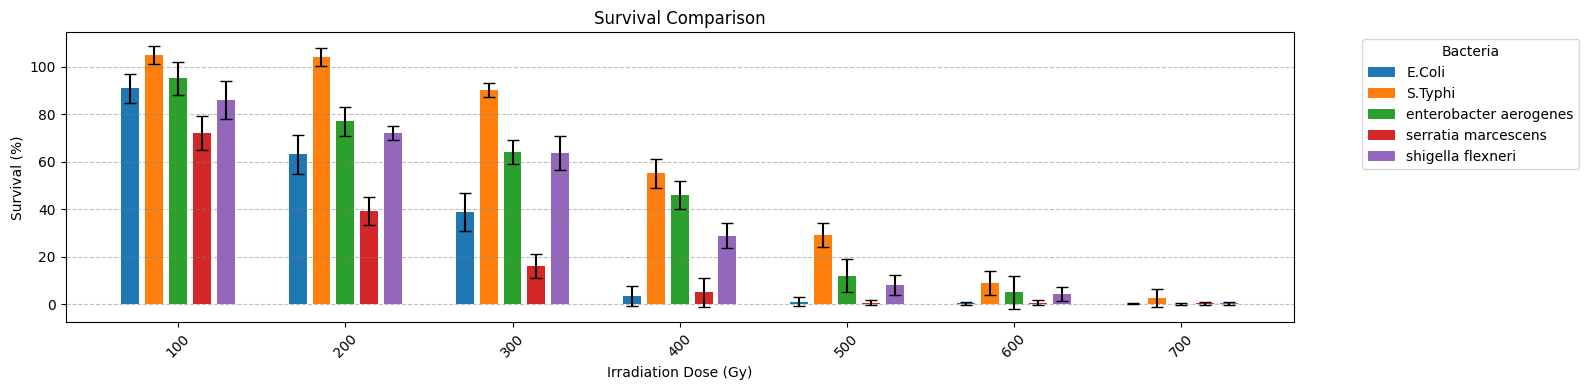

In [5]:
# Visualization
import matplotlib.pyplot as plt
import numpy as np


# Plotting with the calibrated data
fig, ax = plt.subplots(figsize=(16, 4))

colors = plt.get_cmap('tab10')

# Number of groups and number of bars in each group
n_groups = len(filtered_df.index)
n_bars = len(filtered_df.columns)
bar_width = 0.15  # Width of a single bar
gap = 0.05  # Gap between groups
group_width = n_bars * bar_width + (n_bars - 1) * gap  # The total width of the group of bars
index = np.arange(n_groups)

# Adjustments for larger gaps between dose groups
group_gap = 0.2  # Increased gap between groups
index = np.linspace(0, n_groups + (group_gap * n_groups), n_groups)  # Recalculate positions with larger gaps

for i, (column_name, column_data) in enumerate(filtered_df.iteritems()):
    pos = index - group_width / 2 + (i * (bar_width + gap)) + bar_width / 2
    ax.bar(pos, column_data, yerr=filtered_std_df[column_name], label=column_name, width=bar_width, capsize=4, color=colors(i))

ax.set_xlabel('Irradiation Dose (Gy)')
ax.set_ylabel('Survival (%)')
ax.set_title('Survival Comparison')
ax.set_xticks(index)
ax.set_xticklabels(filtered_df.index, rotation=45)

# Adding horizontal lines for y-axis values
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

plt.legend(title='Bacteria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Second Irradiation

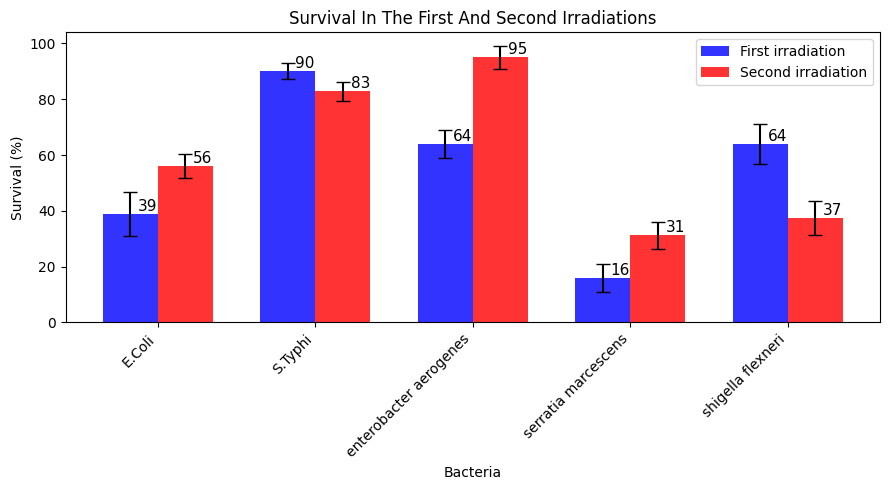

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Given data
first_data = {
    "Bacteria": ["S.Typhi", "S.Typhi", "S.Typhi", "E.Coli", "E.Coli", "E.Coli", "serratia marcescens", "serratia marcescens", "serratia marcescens", "enterobacter aerogenes", "enterobacter aerogenes", "enterobacter aerogenes", "shigella flexneri", "shigella flexneri", "shigella flexneri"],
    300: [0.207, 0.24, 0.249, 0.052, 0.076, 0.064, 0.051, 0.046, 0.033, 0.343, 0.352, 0.389, 0.111, 0.09, 0.101, ],
    "CONTROL": [0.222, 0.269, 0.284, 0.174, 0.184, 0.141, 0.25, 0.267, 0.313, 0.576, 0.559, 0.56, 0.154, 0.151, 0.169]
}

second_data = {
    "Bacteria": ["S.Typhi", "S.Typhi", "S.Typhi", "E.Coli", "E.Coli", "E.Coli", "serratia marcescens", "serratia marcescens", "serratia marcescens", "enterobacter aerogenes", "enterobacter aerogenes", "enterobacter aerogenes", "shigella flexneri", "shigella flexneri", "shigella flexneri"],
    300: [0.521, 0.496, 0.518, 0.518, 0.543, 0.564, 0.249, 0.329, 0.327, 0.802, 0.785, 0.766, 0.415, 0.408, 0.377],
    "CONTROL": [0.604, 0.625, 0.624, 0.859, 0.969, 1.085, 0.97, 0.979, 0.946, 0.825, 0.869, 0.786, 0.967, 1.321, 0.987]
}

# Function to process and normalize data
def process_data(data):
    df = pd.DataFrame(data)
    df_numeric = df.select_dtypes(include=[np.number])
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    df_adjusted = pd.concat([df_numeric, df_non_numeric], axis=1)
    df_adjusted.set_index('Bacteria', inplace=True)
    normalized_df = df_adjusted.div(df_adjusted["CONTROL"], axis=0) * 100
    std_df = normalized_df.groupby('Bacteria').std()
    averaged_df = normalized_df.groupby('Bacteria').mean()
    return averaged_df[300], std_df[300]

# Process both datasets
mean1, std1 = process_data(first_data)
mean2, std2 = process_data(second_data)

fig, ax = plt.subplots(figsize=(9, 5))
index = np.arange(len(mean1))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index - bar_width/2, mean1, bar_width, alpha=opacity, color='b', label='First irradiation', yerr=std1, capsize=5)
rects2 = ax.bar(index + bar_width/2, mean2, bar_width, alpha=opacity, color='r', label='Second irradiation', yerr=std2, capsize=5)

# Loop over the bars to add text annotations
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2. + 0.11, height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=11)

ax.set_xlabel('Bacteria')
ax.set_ylabel('Survival (%)')
ax.set_title('Survival Comparison of The First And Second Irradiations')
ax.set_xticks(index)
ax.set_xticklabels(mean1.index, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

